<a href="https://colab.research.google.com/github/aryan2107-cloud/100-Day-ML-Challenge-/blob/main/Day07_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import (
    train_test_split,
    KFold,
    StratifiedKFold,
    cross_val_score,
    LeaveOneOut,
    RepeatedKFold,
    RepeatedStratifiedKFold,
    TimeSeriesSplit,
    GroupKFold,
    cross_validate,
    GridSearchCV,
    RandomizedSearchCV
)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')

In [ ]:
# Load Heart Disease data
url = "https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv"
df = pd.read_csv(url)

x = df.drop('target', axis=1)
y = df['target']

print(f"Dataset: {x.shape[0]} samples, {x.shape[1]} features")
print(f"target balance: {y.mean():.1%} positive class")

Dataset: 303 samples, 13 features
target balance: 54.5% positive class


The problem with Train/test split

In [ ]:
#demonstrate variance in train/test split
scores = []

for seed in range(50):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

  model = LogisticRegression(max_iter=1000)
  model.fit(x_train, y_train)
  score = model.score(x_test, y_test)
  scores.append(score)

print(f"Accuracy across 50 different random splits")
print(f"  Min: {np.min(scores)}")
print(f"  Max: {np.max(scores)}")
print(f"  Mean: {np.mean(scores)}")
print(f"  Std: {np.std(scores)}")

print(f"\n  Range: {max(scores) - min(scores):.3f} ({(max(scores) - min(scores))*100:.1f} percentage points!)")

Accuracy across 50 different random splits
  Min: 0.7213114754098361
  Max: 0.9344262295081968
  Mean: 0.8318032786885245
  Std: 0.04334942059036108

  Range: 0.213 (21.3 percentage points!)


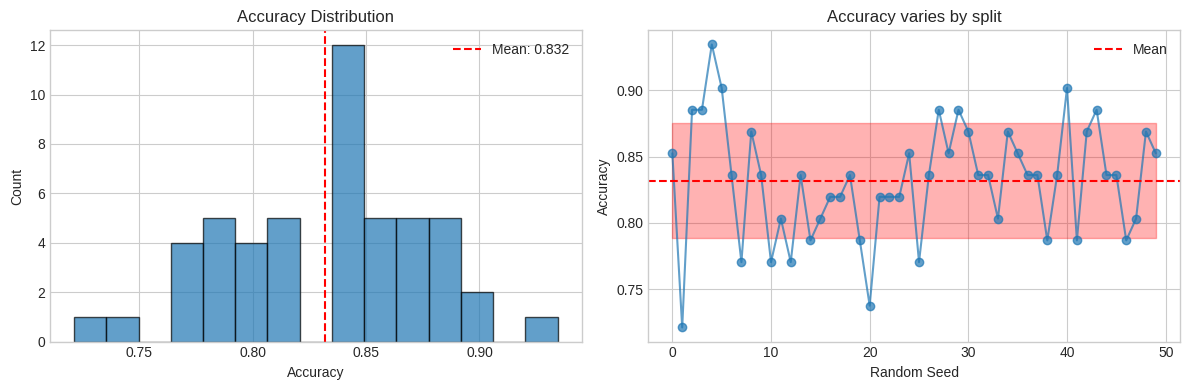

In [ ]:
#visualizing the variance
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(scores, bins=15, edgecolor='black', alpha=0.7)
plt.axvline(np.mean(scores), color='red', linestyle='--', label=f'Mean: {np.mean(scores):.3f}')
plt.xlabel("Accuracy")
plt.ylabel("Count")
plt.title("Accuracy Distribution")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(50), scores, 'o-', alpha=0.7)
plt.axhline(np.mean(scores), color='r', linestyle='--', label='Mean')
plt.fill_between(range(50), np.mean(scores) - np.std(scores),
                 np.mean(scores) + np.std(scores), color='r', alpha=0.3)
plt.xlabel('Random Seed')
plt.ylabel("Accuracy")
plt.title("Accuracy varies by split")
plt.legend()
plt.tight_layout()
plt.show()

K-Fold Cross Validation

In [ ]:
#Basic K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#Visualize the splits
print("K-Fold split visualization (5 folds):")
print('='*50)

for fold, (train_idx, test_idx) in enumerate(kfold.split(x), 1):
  print(f"Fold {fold}: Train={len(train_idx)} samples, Test={len(test_idx)} samples")

K-Fold split visualization (5 folds):
Fold 1: Train=242 samples, Test=61 samples
Fold 2: Train=242 samples, Test=61 samples
Fold 3: Train=242 samples, Test=61 samples
Fold 4: Train=243 samples, Test=60 samples
Fold 5: Train=243 samples, Test=60 samples


In [ ]:
#Using cross_val_score (simplest way)
model = LogisticRegression(max_iter=1000)

scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

print("5-fold cross-validation scores:")
print(f"Scores: {scores}")
print(f"Mean: {np.mean(scores):.3f}")
print(f"Std: {np.std(scores):.3f}")
print(f"Min: {np.min(scores):.3f}")
print(f"\n  Report as: {scores.mean():.3f} ± {scores.std():.3f}")

5-fold cross-validation scores:
Scores: [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Mean: 0.828
Std: 0.046
Min: 0.750

  Report as: 0.828 ± 0.046


In [ ]:
#Compare different K-values
k_values = [3, 5, 10, 15, 20]
results = []

for k in k_values:
  scores = cross_val_score(model, x, y, cv=k, scoring='accuracy')
  results.append({
      'K': k,
      'Mean': np.mean(scores),
      'Std': np.std(scores),
      'Min': np.min(scores),
      'Max': np.max(scores)
  })

  results_df = pd.DataFrame(results)
  print("Comaprison of different K-Values:")
  print(results_df.to_string(index=False))

Comaprison of different K-Values:
 K     Mean      Std     Min      Max
 3 0.841584 0.029148 0.80198 0.871287
Comaprison of different K-Values:
 K     Mean      Std     Min      Max
 3 0.841584 0.029148 0.80198 0.871287
 5 0.828251 0.045732 0.75000 0.868852
Comaprison of different K-Values:
 K     Mean      Std     Min      Max
 3 0.841584 0.029148 0.80198 0.871287
 5 0.828251 0.045732 0.75000 0.868852
10 0.818280 0.062282 0.70000 0.900000
Comaprison of different K-Values:
 K     Mean      Std     Min      Max
 3 0.841584 0.029148 0.80198 0.871287
 5 0.828251 0.045732 0.75000 0.868852
10 0.818280 0.062282 0.70000 0.900000
15 0.821746 0.080989 0.65000 0.950000
Comaprison of different K-Values:
 K     Mean      Std     Min      Max
 3 0.841584 0.029148 0.80198 0.871287
 5 0.828251 0.045732 0.75000 0.868852
10 0.818280 0.062282 0.70000 0.900000
15 0.821746 0.080989 0.65000 0.950000
20 0.831667 0.090162 0.60000 0.933333


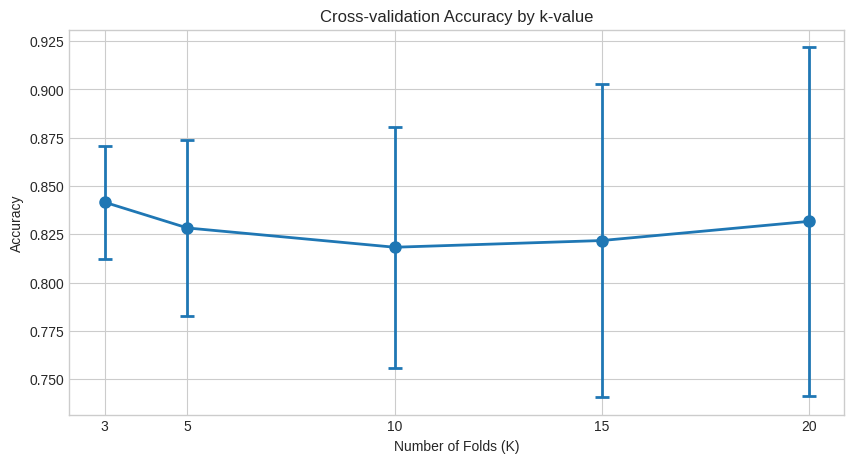

  K=5 or K=10: Most common, good balance
  Higher K: Less bias, more variance, slower
  Lower K: More bias, faster


In [ ]:
#visualize K comparison
fig, ax = plt.subplots(figsize=(10, 5))

ax.errorbar(results_df['K'], results_df['Mean'], yerr=results_df['Std'],
            fmt='o-', capsize=5, capthick=2, linewidth=2, markersize=8)
ax.set_xlabel('Number of Folds (K)')
ax.set_ylabel('Accuracy')
ax.set_title('Cross-validation Accuracy by k-value')
ax.set_xticks(k_values)
plt.show()

print("  K=5 or K=10: Most common, good balance")
print("  Higher K: Less bias, more variance, slower")
print("  Lower K: More bias, faster")

Stratified K-Fold - Ensures each fold has the same proportion of classes as the full dataset.

Critical for imbalanced classification!

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print(f"Class distribution in each fold:")
print(f"="*60)
print(f"Overall: {y.mean():.1%} positive")

print("Regular K-Fold:")
for fold, (train_idx, test_idx) in enumerate(kfold.split(x), 1):
  test_positive = y.iloc[test_idx].mean()
  print(f"Fold {fold}: {test_positive:.1%} positive in test")

print('\n Stratified K-Fold:')
for fold, (train_idx, test_idx) in enumerate(stratified.split(x, y)):
  test_positive = y.iloc[test_idx].mean()
  print(f"Fold {fold}: {test_positive:.1%} positive in test")

Class distribution in each fold:
Overall: 54.5% positive
Regular K-Fold:
Fold 1: 52.5% positive in test
Fold 2: 62.3% positive in test
Fold 3: 50.8% positive in test
Fold 4: 55.0% positive in test
Fold 5: 51.7% positive in test

 Stratified K-Fold:
Fold 0: 54.1% positive in test
Fold 1: 54.1% positive in test
Fold 2: 54.1% positive in test
Fold 3: 55.0% positive in test
Fold 4: 55.0% positive in test


In [ ]:
#create an imbalanced dataset to show the difference
#simulate: only 10% positive class

np.random.seed(42)
imbalanced_idx = (y==0) | (np.random.random(len(y)) < 0.2)
x_imb = x[imbalanced_idx]
y_imb = y[imbalanced_idx]

print(f'Imbalanced dataset: {y_imb.mean():.1%} postive class')
print(f"Samples: {len(y_imb)}")

Imbalanced dataset: 22.0% postive class
Samples: 177


In [ ]:
#Compare on imbalanced data
print("On imbalanced data:")
print('='*60)

#Regular KFold
kfold_scores = cross_val_score(model, x_imb, y_imb, cv=KFold(5, shuffle=True, random_state=42))
print(f"Regular K-Fold Scores: {kfold_scores.mean():.3f} +- {kfold_scores.std():.3f}")

#Stratified KFold
strat_scores = cross_val_score(model, x_imb, y_imb, cv=StratifiedKFold(5, shuffle=True, random_state=42))
print(f"Stratified K-Fold Scores: {strat_scores.mean():.3f} +- {strat_scores.std():.3f}")

print(f"\nVariance reduction: {kfold_scores.std() - strat_scores.std():.4f}")
print("\n→ Stratified has more consistent results!")

On imbalanced data:
Regular K-Fold Scores: 0.842 +- 0.057
Stratified K-Fold Scores: 0.837 +- 0.031

Variance reduction: 0.0263

→ Stratified has more consistent results!


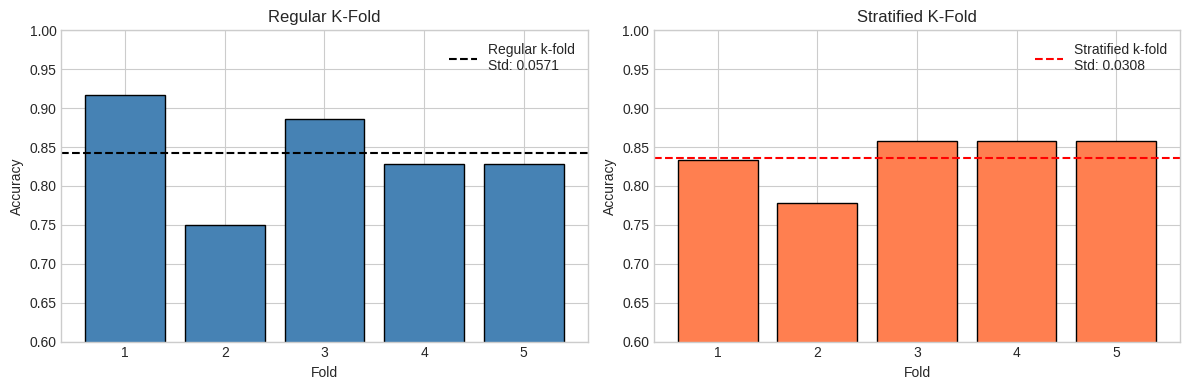

In [ ]:
#visualize the difference
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(range(1, 6), kfold_scores, color='steelblue', edgecolor='black')
axes[0].axhline(kfold_scores.mean(), color='black', linestyle='--', label=f"Regular k-fold\nStd: {kfold_scores.std():.4f}")
axes[0].set_xlabel("Fold")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Regular K-Fold")
axes[0].legend()
axes[0].set_ylim(0.6, 1.0)

axes[1].bar(range(1, 6), strat_scores, color='coral', edgecolor='black')
axes[1].axhline(strat_scores.mean(), color='r', linestyle='--', label=f"Stratified k-fold\nStd: {strat_scores.std():.4f}")
axes[1].set_xlabel("Fold")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Stratified K-Fold")
axes[1].legend()
axes[1].set_ylim(0.6, 1.0)

plt.tight_layout()
plt.show()

Leave-One-Out Cross-Validation

Extreme case: K = number of samples. Each sample is the test set once.

Use for: Very small datasets (<100-200 samples)

In [ ]:
x_small = x.head(100)
y_small = y.head(100)

loo = LeaveOneOut()

print(f"Leave-One-Out CV on {len(x_small)} samples:")
print(f"Number of FOlds: {loo.get_n_splits(x_small)}")
print(f"Each Fold: Train on: {len(x_small)-1}, Test on 1")

Leave-One-Out CV on 100 samples:
Number of FOlds: 100
Each Fold: Train on: 99, Test on 1


In [ ]:
# Run LOO (this takes a moment)
print("Running LOO CV (this may take a few seconds)...")

_, x_small, _, y_small = train_test_split(x, y, test_size=100, stratify=y, random_state=42)

loo_scores = cross_val_score(model, x_small, y_small, cv=loo)

print(f"\nLOO Results:")
print(f"  Accuracy: {loo_scores.mean():.3f}")

Running LOO CV (this may take a few seconds)...

LOO Results:
  Accuracy: 0.810


In [ ]:
# Compare LOO vs K-Fold on small data
print("Comparison on Small Dataset (n=100):")
print("="*50)

kfold_small = cross_val_score(model, x_small, y_small, cv=5)
kfold_10 = cross_val_score(model, x_small, y_small, cv=10)

print(f"5-Fold: {kfold_small.mean():.3f} ± {kfold_small.std():.3f}")
print(f"10-Fold: {kfold_10.mean():.3f} ± {kfold_10.std():.3f}")
print(f"LOO: {loo_scores.mean():.3f}")

print("\n⚠️  LOO is computationally expensive!")
print("   Only use for very small datasets.")

Comparison on Small Dataset (n=100):
5-Fold: 0.790 ± 0.058
10-Fold: 0.810 ± 0.083
LOO: 0.810

⚠️  LOO is computationally expensive!
   Only use for very small datasets.


Repeated K-Fold

Run K-Fold multiple times with different random splits for even more robust estimates

In [ ]:
#Repeated k-fold
repeated_kfold = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
repeated_stratified = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

print(f"Repeated K-Fold CV on {repeated_kfold.get_n_splits(x)} total fits")
print(f"      (5 folds x 10 repeats)")

Repeated K-Fold CV on 50 total fits
      (5 folds x 10 repeats)


In [ ]:
#Compare standard vs repeated
standard_scores = cross_val_score(model, x, y, cv=5)
repeated_scores = cross_val_score(model, x, y, cv=repeated_stratified)

print("Standard 5-Fold vs Repeated 5-Fold (10 repeats):")
print("="*50)
print(f"Standard: {standard_scores.mean():.3f} ± {standard_scores.std():.3f} (n=5)")
print(f"Repeated: {repeated_scores.mean():.3f} ± {repeated_scores.std():.3f} (n=50)")

print("\n→ Repeated gives more stable estimate with tighter confidence.")

Standard 5-Fold vs Repeated 5-Fold (10 repeats):
Standard: 0.828 ± 0.046 (n=5)
Repeated: 0.831 ± 0.041 (n=50)

→ Repeated gives more stable estimate with tighter confidence.


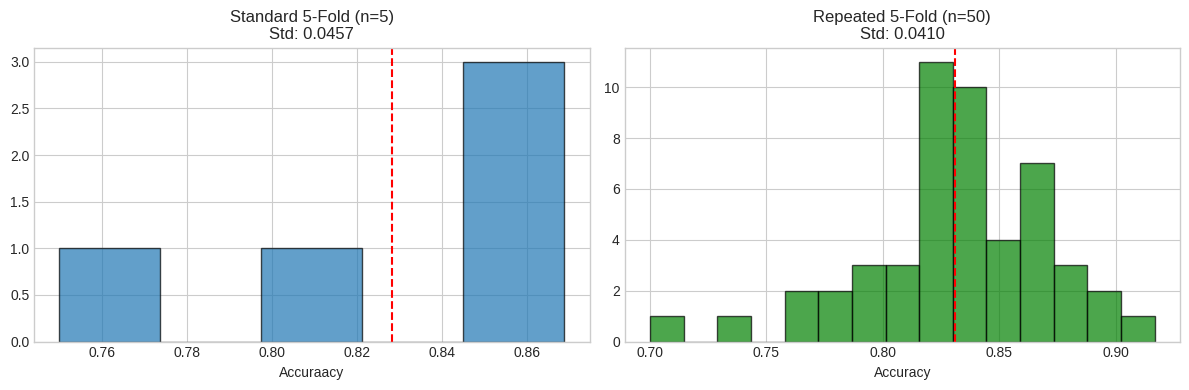

In [ ]:
#Visualize repeated cv
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(standard_scores, bins=5, edgecolor='black', alpha=0.7)
axes[0].axvline(standard_scores.mean(), color='r', linestyle='--')
axes[0].set_title(f"Standard 5-Fold (n=5)\nStd: {standard_scores.std():.4f}")
axes[0].set_xlabel("Accuraacy")

axes[1].hist(repeated_scores, bins=15, edgecolor='black', alpha=0.7, color='green')
axes[1].axvline(repeated_scores.mean(), color='red', linestyle='--')
axes[1].set_title(f"Repeated 5-Fold (n=50)\nStd: {repeated_scores.std():.4f}")
axes[1].set_xlabel("Accuracy")

plt.tight_layout()
plt.show()


## Part 6: Time Series Split

**CRITICAL for time-ordered data!**

Regular K-Fold would let the model "peek into the future" — that's data leakage.

```
Regular K-Fold (WRONG for time series):
  Fold 1: [TEST] [train] [train] [train]  ← Testing on past!
  
Time Series Split (CORRECT):
  Fold 1: [train] [TEST]
  Fold 2: [train] [train] [TEST]
  Fold 3: [train] [train] [train] [TEST]
```

In [ ]:
# Load stock data
!pip install yfinance -q

In [ ]:
import yfinance as yf

stock = yf.download("AAPL", start='2020-01-01', end='2024-01-01', progress=False)
stock = stock.reset_index()

print(f"\nStock data: {len(stock)} trading days ")
stock.head()


Stock data: 1006 trading days 


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-01-02,72.468262,72.528582,71.223259,71.476600,135480400
1,2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800
2,2020-01-06,72.335548,72.374154,70.634532,70.885464,118387200
3,2020-01-07,71.995361,72.600968,71.775796,72.345212,108872000
4,2020-01-08,73.153496,73.455095,71.698581,71.698581,132079200


In [ ]:
#generate features for prediction
#We want to predict tomorrow's closing price using today's data
stock_df = stock.copy()

#Handle multilevel columns if present
if isinstance(stock_df.columns, pd.MultiIndex):
  stock_df.columns = [col[0] for col in stock_df.columns]

#Features: laggged values
stock_df['Return'] = stock_df['Close'].pct_change()
stock_df['Lag1'] = stock_df['Close'].shift(1)
stock_df['Lag2'] = stock_df['Close'].shift(2)
stock_df['Lag3'] = stock_df['Close'].shift(3)
stock_df['MA5'] = stock_df['Close'].rolling(5).mean()
stock_df['MA20'] = stock_df['Close'].rolling(20).mean()
stock_df['Volatility'] = stock_df['Return'].rolling(10).std()

#Target: Next day's close
stock_df['Target'] = stock_df['Close'].shift(-1)

#Drop missing values
stock_df = stock_df.dropna()

print(f"Processed data: {len(stock_df)} samples")
stock_df.head()

Processed data: 986 samples


,Date,Close,High,Low,Open,Volume,Return,Lag1,Lag2,Lag3,MA5,MA20,Volatility,Target
19,2020-01-30,78.143143,78.196224,76.907794,77.339686,126743200,-0.001449,78.256538,76.652054,74.543289,76.879337,75.287972,0.016018,74.678383
20,2020-01-31,74.678383,77.856028,74.384022,77.433789,199588400,-0.044339,78.143143,78.256538,76.652054,76.454681,75.398478,0.021750,74.473282
21,2020-02-03,74.473282,75.638658,72.919442,73.421300,173788400,-0.002746,74.678383,78.143143,78.256538,76.440680,75.533956,0.021289,76.931923
22,2020-02-04,76.931923,77.122536,75.672444,76.077792,136616400,0.033014,74.473282,74.678383,78.143143,76.496654,75.763775,0.024044,77.559280
23,2020-02-05,77.559280,78.357915,76.956082,78.058723,118826800,0.008155,76.931923,74.473282,74.678383,76.357202,76.041971,0.024143,78.466469


In [ ]:
#prepare x and y
feature_cols = ['Lag1', 'Lag2', 'Lag3', 'MA5', 'MA20', 'Volatility', 'Volume']

x_stock = stock_df[feature_cols]
y_stock = stock_df['Target']

print(f"Features: {feature_cols}")
print(f"Shape: {x_stock.shape}")

Features: ['Lag1', 'Lag2', 'Lag3', 'MA5', 'MA20', 'Volatility', 'Volume']
Shape: (986, 7)


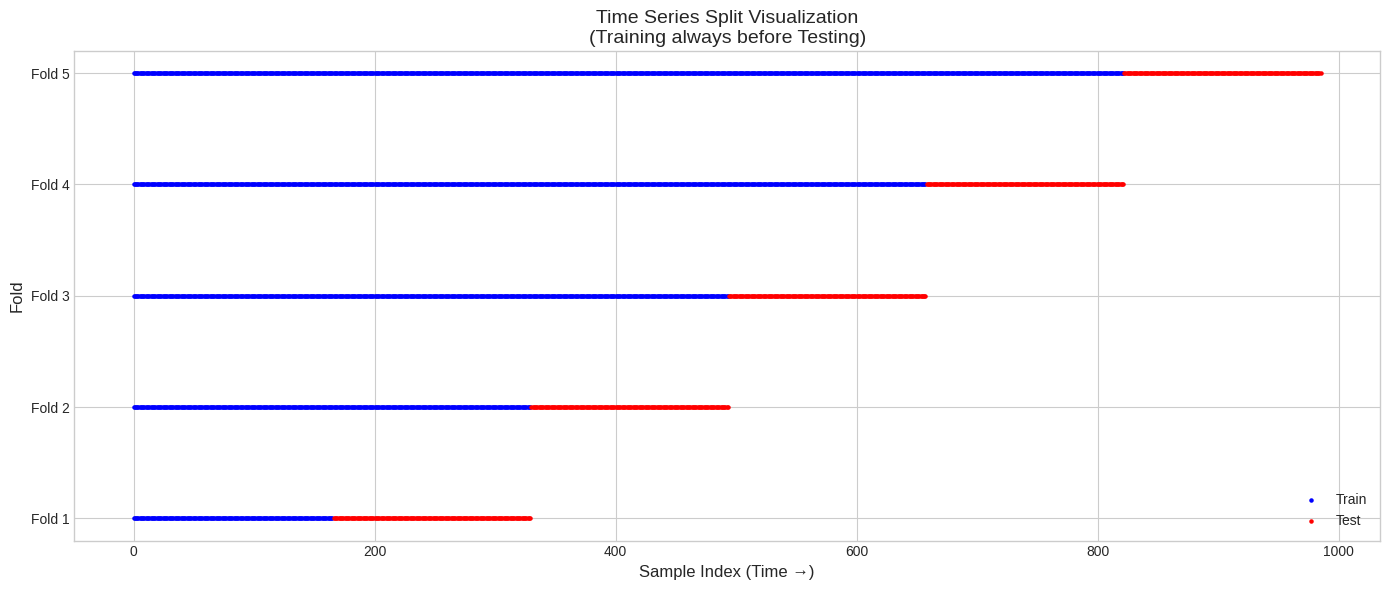

→ Training set grows with each fold
→ Test set is always in the future


In [ ]:
#%%
# Visualize Time Series Split
tscv = TimeSeriesSplit(n_splits=5)

fig, ax = plt.subplots(figsize=(14, 6))

for fold, (train_idx, test_idx) in enumerate(tscv.split(x_stock)):
    # Plot train indices
    ax.scatter(train_idx, [fold] * len(train_idx), c='blue', s=5, label='Train' if fold == 0 else '')
    # Plot test indices
    ax.scatter(test_idx, [fold] * len(test_idx), c='red', s=5, label='Test' if fold == 0 else '')

ax.set_xlabel('Sample Index (Time →)', fontsize=12)
ax.set_ylabel('Fold', fontsize=12)
ax.set_title('Time Series Split Visualization\n(Training always before Testing)', fontsize=14)
ax.set_yticks(range(5))
ax.set_yticklabels([f'Fold {i+1}' for i in range(5)])
ax.legend()

plt.tight_layout()
plt.show()

print("→ Training set grows with each fold")
print("→ Test set is always in the future")

In [ ]:
#Compare regular k-fold vs TIme series split
model_reg = Ridge()

#Regular k-fold on time series
kfold_scores_ts = cross_val_score(model_reg, x_stock, y_stock, cv=5, scoring='r2')

#Time series split
tscv_scores = cross_val_score(model_reg, x_stock, y_stock, cv=TimeSeriesSplit(n_splits=5), scoring='r2')

print("Stock price Prediction (R^2 score): ")
print("="*50)
print("Regular k-fold: ", kfold_scores_ts.mean())
print("Time series split: ", tscv_scores.mean())



Stock price Prediction (R^2 score): 
Regular k-fold:  0.9240019759568735
Time series split:  0.8973053782169724


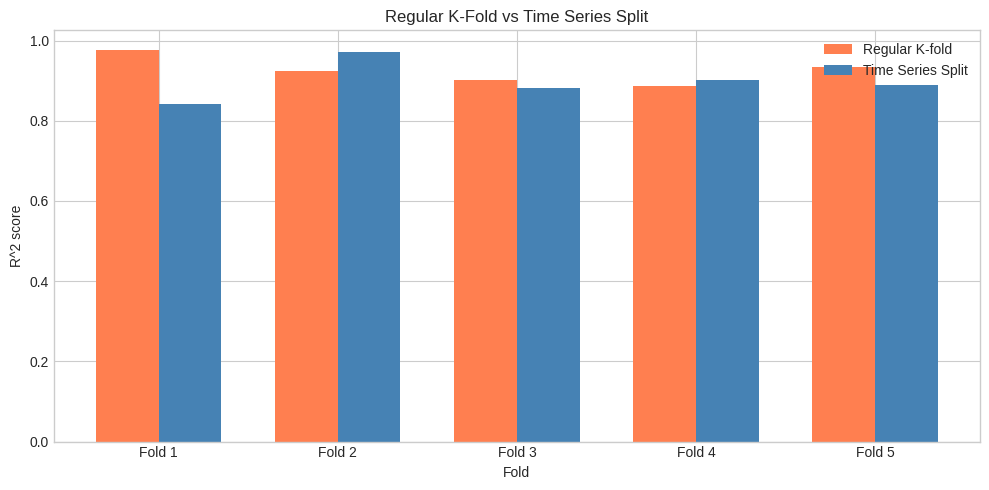

In [ ]:
#Visualize the difference
fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(5)
width = 0.35

bars1 = ax.bar(x - width/2, kfold_scores_ts, width, label='Regular K-fold', color='coral')
bars2 = ax.bar(x + width/2, tscv_scores, width, label='Time Series Split', color='steelblue')

ax.set_xlabel('Fold')
ax.set_ylabel("R^2 score")
ax.set_title("Regular K-Fold vs Time Series Split")
ax.set_xticks(x)
ax.set_xticklabels([f'Fold {i+1}' for i in range(5)])
ax.legend()
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

Group K-Fold

When samples are grouped (e.g., multiple readings per patient), you don't want the same group in both train and test.

Example: Patient A has 5 visits. All 5 should be in either train OR test, not split

In [61]:
np.random.seed(42)

# Create 50 patients with 2-8 visits each
n_patients = 50
patient_ids = []
visits_data = []

for patient_id in range(n_patients):
    n_visits = np.random.randint(2, 9)
    for visit in range(n_visits):
        patient_ids.append(patient_id)
        # Simulate features that are correlated within patient
        base = np.random.randn(13) * 10 + 50
        noise = np.random.randn(13) * 2
        visits_data.append(base + noise)

x_grouped = pd.DataFrame(visits_data, columns=df.drop('target', axis=1).columns)
y_grouped = pd.Series(np.random.randint(0, 2, len(visits_data)))
groups = np.array(patient_ids)

print(f"Grouped data: {len(x_grouped)} samples from {n_patients} patients")
print(f"Visits per patient: {pd.Series(groups).value_counts().describe()[['min', 'max', 'mean']].to_dict()}")

Grouped data: 233 samples from 50 patients
Visits per patient: {'min': 2.0, 'max': 8.0, 'mean': 4.66}


In [62]:
# Compare regullar K-Fold vs Group k-Fold
from sklearn.model_selection import GroupKFold

regular_kfold = KFold(n_splits=5, shuffle=True, random_state=42)
group_kfold = GroupKFold(n_splits=5)

for fold, (train_idx, test_idx) in enumerate(regular_kfold.split(x_grouped), 1):
  train_patients = set(groups[train_idx])
  test_patients = set(groups[test_idx])
  overlap = train_patients.intersection(test_patients)
  print(f"Fold {fold}: Train={len(train_idx)} samples, Test={len(test_idx)} samples")

Fold 1: Train=186 samples, Test=47 samples
Fold 2: Train=186 samples, Test=47 samples
Fold 3: Train=186 samples, Test=47 samples
Fold 4: Train=187 samples, Test=46 samples
Fold 5: Train=187 samples, Test=46 samples


In [64]:
print("\n Group K-Fold (no leakage): ")
print('='*50)

for fold, (train_idx, test_idx) in enumerate(group_kfold.split(x_grouped, y_grouped, groups), 1):
  train_patients = set(groups[train_idx])
  test_patients = set(groups[test_idx])
  overlap = train_patients.intersection(test_patients)
  print(f"Fold {fold}: {len(overlap)} patients in both (Train: {len(train_patients)}, Test: {len(test_patients)})")


 Group K-Fold (no leakage): 
Fold 1: 0 patients in both (Train: 40, Test: 10)
Fold 2: 0 patients in both (Train: 40, Test: 10)
Fold 3: 0 patients in both (Train: 40, Test: 10)
Fold 4: 0 patients in both (Train: 40, Test: 10)
Fold 5: 0 patients in both (Train: 40, Test: 10)


In [65]:
#Compare scores
regular_scores = cross_val_score(model, x_grouped, y_grouped, cv=regular_kfold)
group_scores = cross_val_score(model, x_grouped, y_grouped, cv=group_kfold, groups=groups)

print("Grouped Data Cross-Validation:")
print("="*50)
print(f"Regular K-Fold (with leakage): {regular_scores.mean():.3f} ± {regular_scores.std():.3f}")
print(f"Group K-Fold (no leakage): {group_scores.mean():.3f} ± {group_scores.std():.3f}")

print("\n→ Regular K-Fold is overly optimistic due to leakage.")

Grouped Data Cross-Validation:
Regular K-Fold (with leakage): 0.467 ± 0.051
Group K-Fold (no leakage): 0.442 ± 0.037

→ Regular K-Fold is overly optimistic due to leakage.



## Part 8: Nested Cross-Validation

**The Problem:** If you use CV to both tune hyperparameters AND evaluate performance, you get overly optimistic results.

**Solution:** Nested CV = Outer loop (evaluation) + Inner loop (tuning)

```
Outer Loop (5-fold): Evaluate final performance
  └── Inner Loop (3-fold): Tune hyperparameters
```

In [69]:
# Non-nested CV (WRONG way to report)
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Re-assign x to the original feature set from df
x = df.drop('target', axis=1)

# Grid search with CV (this gives biased estimate)
grid_search = GridSearchCV(
    LogisticRegression(solver='liblinear', max_iter=1000),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(x, y)

print("Non-Nested CV (biased):")
print(f"  Best params: {grid_search.best_params_}")
print(f"  Best score: {grid_search.best_score_:.3f}")

Non-Nested CV (biased):
  Best params: {'C': 0.1, 'penalty': 'l2'}
  Best score: 0.835


In [71]:
#The correct way
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

nested_scores = []
best_params_list = []

print("Nested CV Progress:")
for fold, (train_idx, test_idx) in enumerate(outer_cv.split(x, y), 1):
  x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
  y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

  #inner cv
  inner_grid = GridSearchCV(
      LogisticRegression(solver='liblinear', max_iter=1000),
      param_grid,
      cv = inner_cv,
      scoring='accuracy'
  )
  inner_grid.fit(x_train, y_train)

  #Evaluate on outer test set
  score = inner_grid.score(x_test, y_test)
  nested_scores.append(score)
  best_params_list.append(inner_grid.best_params_)

  print(f"Fold {fold}: Best params: {inner_grid.best_params_}, Score: {score:.3f}")




Nested CV Progress:
Fold 1: Best params: {'C': 1, 'penalty': 'l1'}, Score: 0.885
Fold 2: Best params: {'C': 0.1, 'penalty': 'l2'}, Score: 0.803
Fold 3: Best params: {'C': 1, 'penalty': 'l1'}, Score: 0.754
Fold 4: Best params: {'C': 0.1, 'penalty': 'l2'}, Score: 0.817
Fold 5: Best params: {'C': 0.1, 'penalty': 'l2'}, Score: 0.850


In [72]:
# Compare nested vs non-nested
print("\nComparison:")
print("="*50)
print(f"Non-Nested CV: {grid_search.best_score_:.3f}")
print(f"Nested CV: {np.mean(nested_scores):.3f} ± {np.std(nested_scores):.3f}")
print(f"\nDifference: {grid_search.best_score_ - np.mean(nested_scores):.3f}")
print("\n→ Non-nested is optimistic by ~1-2% (typical).")


Comparison:
Non-Nested CV: 0.835
Nested CV: 0.822 ± 0.044

Difference: 0.013

→ Non-nested is optimistic by ~1-2% (typical).
